# Exploratory Data Analysis on the netflix dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Step 1: Load and Inspect the Dataset
#Load the Netflix Dataset
df = pd.read_csv("Project 3_data.csv")  # Load dataset
df.head()  # Preview first few rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
#Check for Missing Values
df.info()  # Check column data types and missing values
df.isnull().sum()  # Count missing values per column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [4]:
#Step 2: Data Cleaning & Preprocessing
#Select Relevant Columns

df = df[['title', 'type', 'release_year', 'listed_in']]  # Keep only useful columns
df = df.dropna()  # Drop missing values

In [5]:
# Split Multiple Genres
df['listed_in'] = df['listed_in'].str.split(', ')  # Convert genre string to list
df = df.explode('listed_in')  # Expand rows for multiple genres
df.rename(columns={'listed_in': 'genre'}, inplace=True)  # Rename column

In [6]:
#Convert Release Year to Integer
df['release_year'] = df['release_year'].astype(int)

In [7]:
#Step 3: Analyze Genre Trends Over Time
#Count Movies & TV Shows by Genre and Year
genre_trends = df.groupby(['release_year', 'genre']).size().reset_index(name='count')

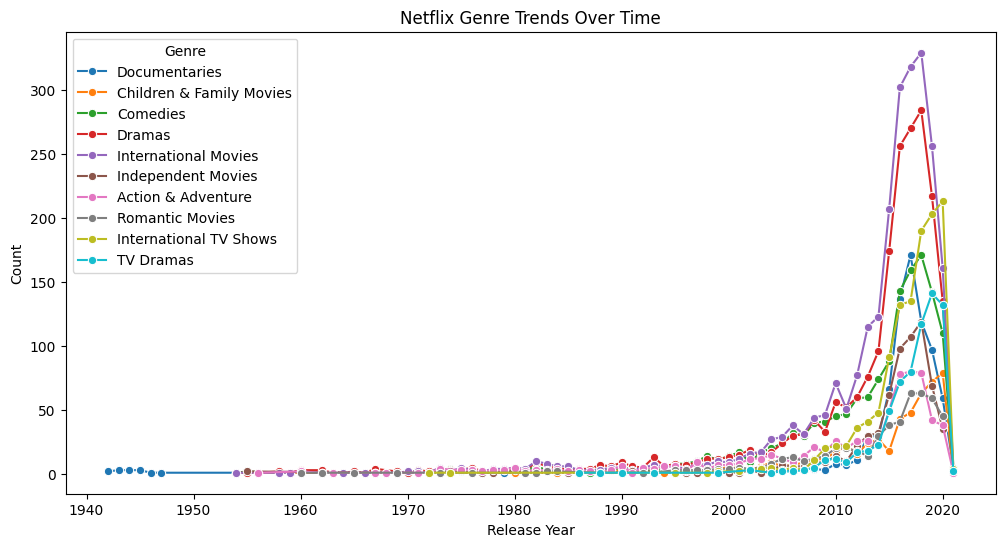

In [8]:
#Visualize Genre Trends
plt.figure(figsize=(12, 6))
top_genres = genre_trends.groupby("genre")["count"].sum().nlargest(10).index  # Top 10 genres
genre_filtered = genre_trends[genre_trends['genre'].isin(top_genres)]  # Filter top genres

sns.lineplot(data=genre_filtered, x="release_year", y="count", hue="genre", marker="o")
plt.title("Netflix Genre Trends Over Time")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.legend(title="Genre")
plt.show()

In [9]:
#Step 4: Identify the Fastest Growing & Declining Genres
#Compare Genre Counts in Early vs. Later Years
early_period = df[df['release_year'] < 2015].groupby('genre').size()
late_period = df[df['release_year'] >= 2015].groupby('genre').size()

growth = (late_period - early_period).dropna().sort_values(ascending=False)
growth.head(10)  # Top 10 fastest-growing genres
growth.tail(10)  # Top 10 declining genres


genre
Teen TV Shows            32
Faith & Spirituality     23
Sci-Fi & Fantasy         18
Action & Adventure       15
Movies                   12
Anime Features            3
TV Shows                  0
Classic & Cult TV        -7
Cult Movies             -53
Classic Movies         -101
dtype: int64

In [10]:
#Step 5: Compare Genre Distribution in TV Shows vs. Movies
#Split TV Shows vs. Movies
tv_shows = df[df['type'] == "TV Show"]
movies = df[df['type'] == "Movie"]

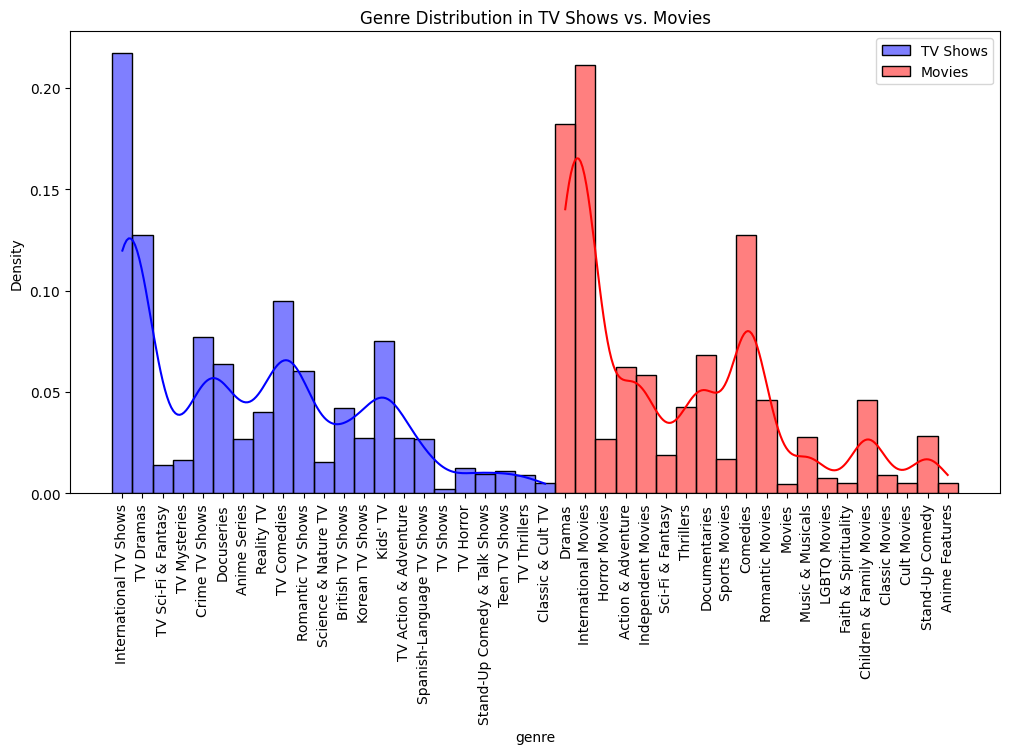

In [11]:
#Plot Genre Distribution for TV Shows & Movies
plt.figure(figsize=(12, 6))
sns.histplot(tv_shows['genre'], color="blue", label="TV Shows", kde=True, stat="density", bins=30)
sns.histplot(movies['genre'], color="red", label="Movies", kde=True, stat="density", bins=30)
plt.xticks(rotation=90)
plt.title("Genre Distribution in TV Shows vs. Movies")
plt.legend()
plt.show()

#✅ Insights to Look For:

#Are some genres more common in TV Shows than in Movies?
#Has Netflix been shifting focus from movies to TV shows in certain genres?

In [12]:
#Step 6 (Optional): Compare Netflix Trends with External Data
#Add IMDB or Rotten Tomatoes Ratings

# Load IMDb title basics dataset
imdb_basics = pd.read_csv("title.basics.tsv", sep="\t", dtype=str, low_memory=False)

# Load IMDb ratings dataset
imdb_ratings = pd.read_csv("title.ratings.tsv", sep="\t", dtype=str, low_memory=False)

# Preview datasets
print(imdb_basics.head())
print(imdb_ratings.head())

      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short            Poor Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1                     Short  
      tconst averageRating numVotes
0  tt0000001           5.7     2142
1  tt0000002           5.5      290
2  tt0000003         

In [13]:
#Step 2: Merge IMDb Basics & Ratings
# Merge IMDb title and ratings data
imdb_full = pd.merge(imdb_basics, imdb_ratings, on="tconst", how="inner")

# Keep only relevant columns
imdb_full = imdb_full[["tconst", "primaryTitle", "titleType", "averageRating", "numVotes"]]

# Convert rating and votes to numeric
imdb_full["averageRating"] = pd.to_numeric(imdb_full["averageRating"])
imdb_full["numVotes"] = pd.to_numeric(imdb_full["numVotes"])

# Preview merged IMDb dataset
print(imdb_full.head())


      tconst            primaryTitle titleType  averageRating  numVotes
0  tt0000001              Carmencita     short            5.7      2142
1  tt0000002  Le clown et ses chiens     short            5.5       290
2  tt0000003            Poor Pierrot     short            6.4      2178
3  tt0000004             Un bon bock     short            5.3       186
4  tt0000005        Blacksmith Scene     short            6.2      2913


In [14]:
#Step 3: Load Netflix Dataset
# Load Netflix dataset
netflix = pd.read_csv("project 3_data.csv")

# Keep relevant columns
netflix = netflix[['title', 'type', 'release_year']]

# Standardize column names
netflix.rename(columns={'title': 'primaryTitle', 'type': 'titleType'}, inplace=True)

# Map Netflix "type" column to IMDb format
netflix['titleType'] = netflix['titleType'].map({'Movie': 'movie', 'TV Show': 'tvSeries'})

# Preview cleaned Netflix dataset
print(netflix.head())

  primaryTitle titleType  release_year
0           3%  tvSeries          2020
1         7:19     movie          2016
2        23:59     movie          2011
3            9     movie          2009
4           21     movie          2008


In [15]:
#Step 4: Merge Netflix Data with IMDb
# Merge Netflix dataset with IMDb ratings
netflix_imdb = pd.merge(netflix, imdb_full, on=["primaryTitle", "titleType"], how="left")

# Preview final merged dataset
print(netflix_imdb.head())

  primaryTitle titleType  release_year     tconst  averageRating  numVotes
0           3%  tvSeries          2020  tt4922804            7.3   29149.0
1         7:19     movie          2016  tt5979312            5.8     701.0
2        23:59     movie          2011  tt2100376            4.6    1049.0
3            9     movie          2009  tt0342012            7.6    2261.0
4            9     movie          2009  tt0472033            7.0  152323.0


In [16]:
#Step 5: Handle Missing Ratings
# Fill missing IMDb ratings with a default value
netflix_imdb.loc[:, 'averageRating'] = netflix_imdb['averageRating'].fillna(0)
netflix_imdb.loc[:, 'numVotes'] = netflix_imdb['numVotes'].fillna(0)

# Convert rating columns to numeric
netflix_imdb['averageRating'] = pd.to_numeric(netflix_imdb['averageRating'])
netflix_imdb['numVotes'] = pd.to_numeric(netflix_imdb['numVotes'])

In [17]:
print(netflix_imdb.head())

  primaryTitle titleType  release_year     tconst  averageRating  numVotes
0           3%  tvSeries          2020  tt4922804            7.3   29149.0
1         7:19     movie          2016  tt5979312            5.8     701.0
2        23:59     movie          2011  tt2100376            4.6    1049.0
3            9     movie          2009  tt0342012            7.6    2261.0
4            9     movie          2009  tt0472033            7.0  152323.0


In [18]:
#step 7: Keep Only the Most Popular Entry (Highest IMDb Votes)
# Sort by numVotes in descending order
netflix_imdb_sorted = netflix_imdb.sort_values(by="numVotes", ascending=False)

# Drop duplicates, keeping the highest voted version
netflix_imdb_cleaned = netflix_imdb_sorted.drop_duplicates(subset=["primaryTitle", "titleType"], keep="first")

# Reset index
netflix_imdb_cleaned = netflix_imdb_cleaned.reset_index(drop=True)

# Preview cleaned dataset
print(netflix_imdb_cleaned.head())

                                    primaryTitle titleType  release_year  \
0                                      Inception     movie          2010   
1                                   Pulp Fiction     movie          1994   
2                                   Breaking Bad  tvSeries          2013   
3                                     The Matrix     movie          1999   
4  The Lord of the Rings: The Return of the King     movie          2003   

      tconst  averageRating   numVotes  
0  tt1375666            8.8  2666892.0  
1  tt0110912            8.9  2320900.0  
2  tt0903747            9.5  2304095.0  
3  tt0133093            8.7  2142676.0  
4  tt0167260            9.0  2066145.0  


In [19]:
#Step 6: Save the Final Dataset
netflix_imdb_cleaned.to_csv("netflix_with_imdb_ratings.csv", index=False)

# 🎬 Netflix Genre Prediction using Movie Description
This notebook builds a multi-label classification model to predict genres using only the description field, and compares predictions with Netflix’s listed genres across countries.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [21]:
# Load data
df = pd.read_csv("Project 3_data.csv")
df = df[['description', 'listed_in', 'country']].dropna()
df['genre_list'] = df['listed_in'].apply(lambda x: [g.strip() for g in x.split(',')])
df['text_input'] = df['description']

In [22]:
# TF-IDF features and label binarization
tfidf = TfidfVectorizer(ngram_range=(1,2), min_df=3, max_df=0.8, stop_words='english')
X = tfidf.fit_transform(df['text_input'])

mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(df['genre_list'])

In [23]:
# Train/test split
X_train, X_test, Y_train, Y_test, df_train, df_test = train_test_split(
    X, Y, df, test_size=0.2, random_state=42)

# Train model
model = OneVsRestClassifier(LogisticRegression(class_weight='balanced', max_iter=1000))
model.fit(X_train, Y_train);

In [24]:
# Predict and add to df_test
predicted = model.predict(X_test)
df_test['predicted_genres'] = mlb.inverse_transform(predicted)
df_test['predicted_genres'] = df_test['predicted_genres'].apply(lambda x: list(x) if isinstance(x, tuple) else x)

In [25]:
# Genre-country preparation function
def prepare_country_genre_table(df, genre_column):
    df = df[['country', genre_column]].dropna()
    df['country_list'] = df['country'].apply(lambda x: [c.strip() for c in x.split(',')])
    df['genre_list'] = df[genre_column]
    df_exploded = df.explode('genre_list').explode('country_list')
    return df_exploded.groupby('country_list')['genre_list'].value_counts().unstack().fillna(0).astype(int)

# Compute actual and predicted genre distributions
df_test['genre_list'] = df_test['listed_in'].apply(lambda x: [g.strip() for g in x.split(',')])
actual_genre_by_country = prepare_country_genre_table(df_test, 'genre_list')
predicted_genre_by_country = prepare_country_genre_table(df_test, 'predicted_genres')

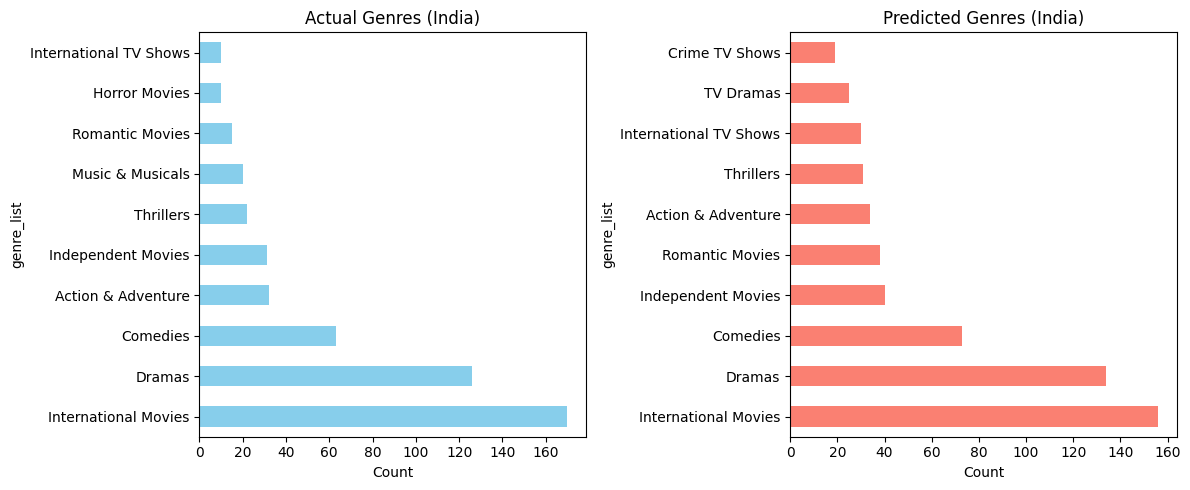

In [26]:
# Plot actual vs predicted genre distribution for India
actual_india = actual_genre_by_country.loc['India'].sort_values(ascending=False).head(10)
predicted_india = predicted_genre_by_country.loc['India'].sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
actual_india.plot(kind='barh', color='skyblue')
plt.title("Actual Genres (India)")
plt.xlabel("Count")

plt.subplot(1, 2, 2)
predicted_india.plot(kind='barh', color='salmon')
plt.title("Predicted Genres (India)")
plt.xlabel("Count")

plt.tight_layout()
plt.show()

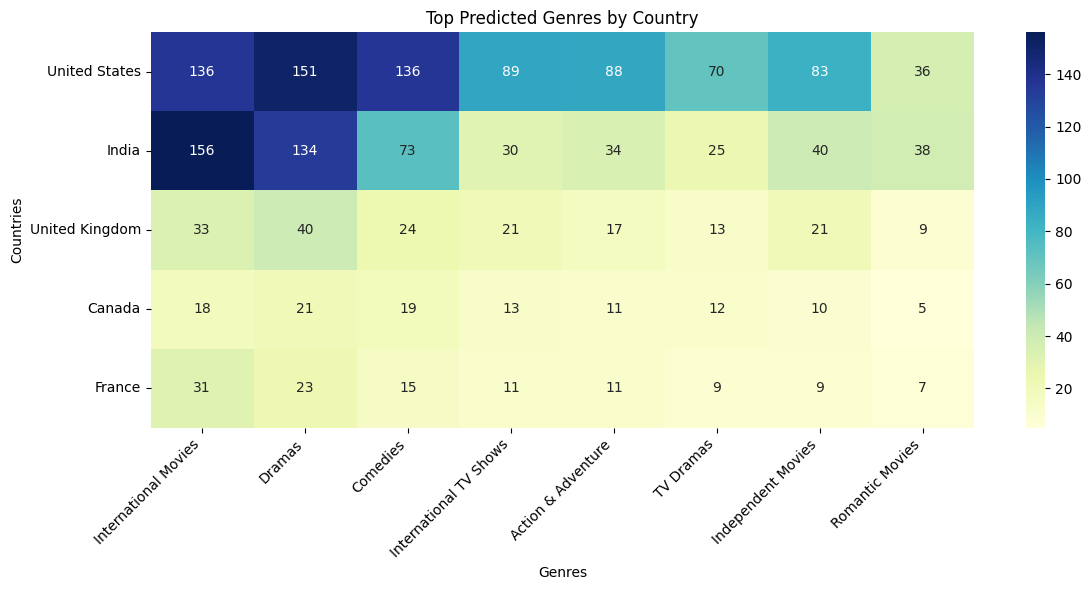

In [27]:
import seaborn as sns

# Get top 5 countries with most predicted genres
top_countries = predicted_genre_by_country.sum(axis=1).sort_values(ascending=False).head(5).index

# Get top 8 predicted genres overall
top_genres = predicted_genre_by_country.sum().sort_values(ascending=False).head(8).index

# Subset data for the heatmap
subset = predicted_genre_by_country.loc[top_countries, top_genres]

# Plot heatmap
plt.figure(figsize=(12, 6))  # Increase width if needed
sns.heatmap(subset, annot=True, fmt='d', cmap="YlGnBu")

plt.title("Top Predicted Genres by Country")
plt.xlabel("Genres")
plt.ylabel("Countries")

# Rotate x-axis and y-axis labels
plt.xticks(rotation=45, ha='right')  # Rotate genre labels for clarity
plt.yticks(rotation=0)               # Keep countries horizontal

plt.tight_layout()
plt.show()


## 📈 Model Evaluation
This section prints the classification report showing precision, recall, and F1-score for each genre.

In [28]:
from sklearn.metrics import classification_report

# Evaluate model performance on test set
Y_pred = model.predict(X_test)
report = classification_report(Y_test, Y_pred, target_names=mlb.classes_, zero_division=0)
print(report)

                              precision    recall  f1-score   support

          Action & Adventure       0.41      0.56      0.48       144
              Anime Features       0.33      0.17      0.22        12
                Anime Series       0.33      0.25      0.29        24
            British TV Shows       0.25      0.17      0.20        52
    Children & Family Movies       0.43      0.51      0.46        85
           Classic & Cult TV       0.00      0.00      0.00         9
              Classic Movies       0.40      0.10      0.16        20
                    Comedies       0.48      0.59      0.53       287
              Crime TV Shows       0.38      0.45      0.41        87
                 Cult Movies       0.00      0.00      0.00        14
               Documentaries       0.64      0.64      0.64       138
                  Docuseries       0.52      0.60      0.56        73
                      Dramas       0.54      0.64      0.58       417
        Faith & Spi

In [29]:
# 📝 Review Predictions
# Get test descriptions (ensure df_test has description column from original df)
desc_test = df_test['description'].values

# Convert predictions to genre labels
predicted_genres = mlb.inverse_transform(Y_pred)
actual_genres = mlb.inverse_transform(Y_test)

# Create comparison DataFrame
results_df = pd.DataFrame({
    'Description': desc_test,
    'Actual Genres': actual_genres,
    'Predicted Genres': predicted_genres
})

# Show first 10 rows
results_df.head(10)


,Description,Actual Genres,Predicted Genres
0,When scientists join Hulk's gamma energy with ...,"(Action & Adventure, Sci-Fi & Fantasy)",()
1,When a gay brainiac with OCD questions his ide...,"(Comedies, Independent Movies, LGBTQ Movies)","(Dramas, International Movies, LGBTQ Movies, M..."
2,A wealthy businessman's miserly habits cause n...,"(Dramas, International Movies)","(Comedies, Dramas, International Movies)"
3,"When Lee Jeong-in and Yu Ji-ho meet, something...","(International TV Shows, Korean TV Shows, Roma...",()
4,When his daughter and son-in-law fall prey to ...,"(Comedies, Dramas, International Movies)","(Action & Adventure, Comedies, Dramas, Interna..."
5,This documentary takes a deep dive into the be...,"(Documentaries,)","(Documentaries, Docuseries)"
6,Years after a police encounter separates him f...,"(Action & Adventure, International Movies, Rom...","(Action & Adventure, Crime TV Shows, Dramas, I..."
7,A former Colombian guerrilla fighter faces cha...,"(Crime TV Shows, International TV Shows, Spani...","(Dramas,)"
8,Footage of the most dramatic moments from Worl...,"(British TV Shows, Docuseries, International T...","(British TV Shows, Documentaries, Docuseries, ..."
9,After a young man charms the girl he loves int...,"(Comedies, International Movies)","(Comedies, Dramas, International Movies, Music..."


## 🔍 Top Keywords by Genre
Inspect the top keywords that the model uses to identify a specific genre.

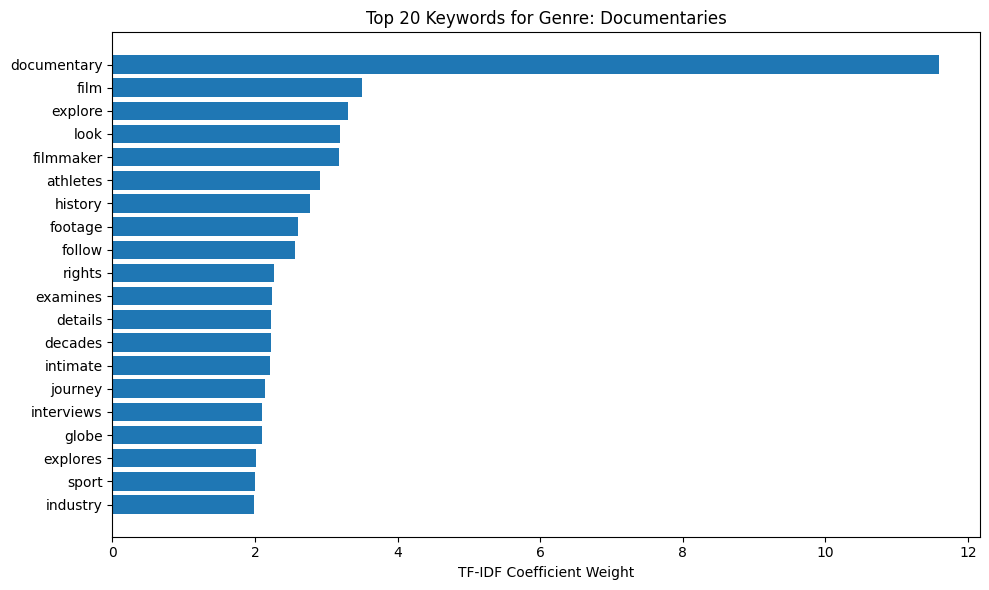

In [30]:
# Select a genre to visualize keywords
genre_name = "Documentaries"  # change this to any genre name
genre_index = list(mlb.classes_).index(genre_name)

# Get feature names and model coefficients
feature_names = tfidf.get_feature_names_out()
genre_coef = model.estimators_[genre_index].coef_[0]

# Get top 20 influential words
top_n = 20
top_indices = genre_coef.argsort()[-top_n:]
top_keywords = feature_names[top_indices]
top_weights = genre_coef[top_indices]

# Plot top keywords
plt.figure(figsize=(10, 6))
plt.barh(top_keywords, top_weights)
plt.title(f"Top {top_n} Keywords for Genre: {genre_name}")
plt.xlabel("TF-IDF Coefficient Weight")
plt.tight_layout()
plt.show()

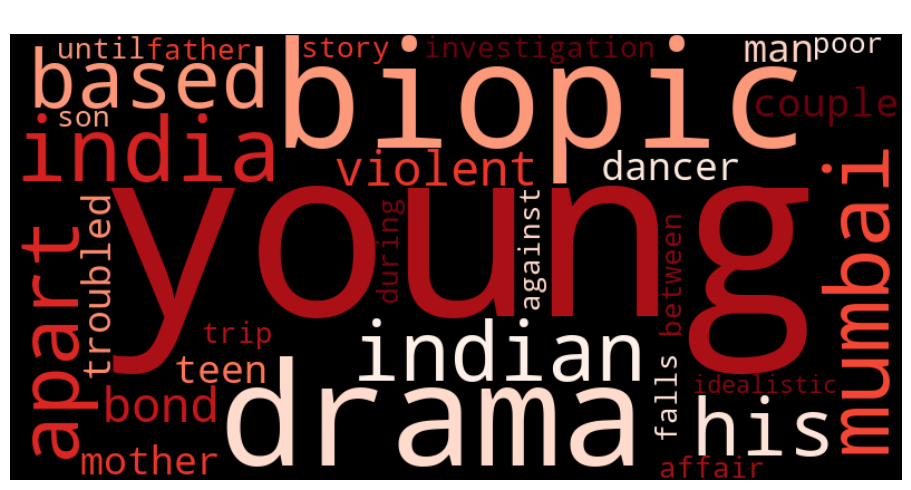

In [31]:

# Word Cloud Generation: Top TF-IDF Keywords for Selected Genre

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['description'])  # Ensure df['description'] exists

# Refit model
model = OneVsRestClassifier(LogisticRegression(max_iter=1000))
model.fit(X_tfidf, Y)  # Y should be your multi-label binarized genre matrix

# Genre selection
selected_genre = "Dramas"
genre_index = list(mlb.classes_).index(selected_genre)
coefs = model.estimators_[genre_index].coef_[0]
feature_names = tfidf_vectorizer.get_feature_names_out()

# Top keywords
top_n = 30
top_indices = coefs.argsort()[::-1][:top_n]
top_keywords = {feature_names[i]: coefs[i] for i in top_indices if i < len(feature_names)}

# Generate word cloud
wc = WordCloud(width=800, height=400, background_color="black", colormap="Reds")
wc.generate_from_frequencies(top_keywords)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title(f"Top TF-IDF Keywords for Genre: {selected_genre}", fontsize=16, color='white')
plt.tight_layout()
plt.show()

In [32]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import pandas as pd


models = {
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(128,), max_iter=300, random_state=42)
}

# Dictionary to store summary results
summary = []

for name, clf in models.items():
    print(f"\nEvaluating: {name}")
    model = OneVsRestClassifier(clf)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    report = classification_report(Y_test, Y_pred, target_names=mlb.classes_, output_dict=True,zero_division=0)
    report_df = pd.DataFrame(report).transpose()
    print(report_df[['precision', 'recall', 'f1-score']].sort_values('f1-score', ascending=False).head(10))

     # Store summary metrics
    summary.append({
        'Model': name,
        'Micro F1': report['micro avg']['f1-score'],
        'Macro F1': report['macro avg']['f1-score'],
        'Weighted F1': report['weighted avg']['f1-score']
    })

# Convert to DataFrame
summary_df = pd.DataFrame(summary)

# Display summary table
print("\n=== Summary of Model Performances ===")
print(summary_df.sort_values('Micro F1', ascending=False).reset_index(drop=True))

# Print best model overall by Micro F1
best_model = summary_df.loc[summary_df['Micro F1'].idxmax()]
print(f"\n🏆 Best Model by Micro F1 among Naive Bayes, Random Forest and MLP Classifier: {best_model['Model']} (Score: {best_model['Micro F1']:.4f})")


Evaluating: Naive Bayes
                      precision    recall  f1-score
International Movies   0.735294  0.209644  0.326264
Dramas                 0.769231  0.143885  0.242424
Stand-Up Comedy        1.000000  0.066667  0.125000
Documentaries          0.900000  0.065217  0.121622
micro avg              0.761702  0.055349  0.103200
weighted avg           0.397868  0.055349  0.090544
samples avg            0.101419  0.052885  0.066598
Comedies               1.000000  0.017422  0.034247
macro avg              0.128679  0.012138  0.020556
Action & Adventure     1.000000  0.006944  0.013793

Evaluating: Random Forest
                      precision    recall  f1-score
Stand-Up Comedy        0.931034  0.450000  0.606742
Documentaries          0.892857  0.362319  0.515464
International Movies   0.633333  0.318658  0.423989
Docuseries             0.937500  0.205479  0.337079
Dramas                 0.566667  0.163070  0.253259
micro avg              0.655536  0.115337  0.196161
weighted avg

##  **Linear Regression using Rotten Tomatoes dataset**
This linear regression model uses Rotten Tomatoes' audience and critic scores to predict the scores for future directed movies and predicts whether a movie is recommended, based on the new predicted critic & audience score, country, director, and genre.

📈 Thresholds → Audience ≥ 63.80, Critic ≥ 63.00


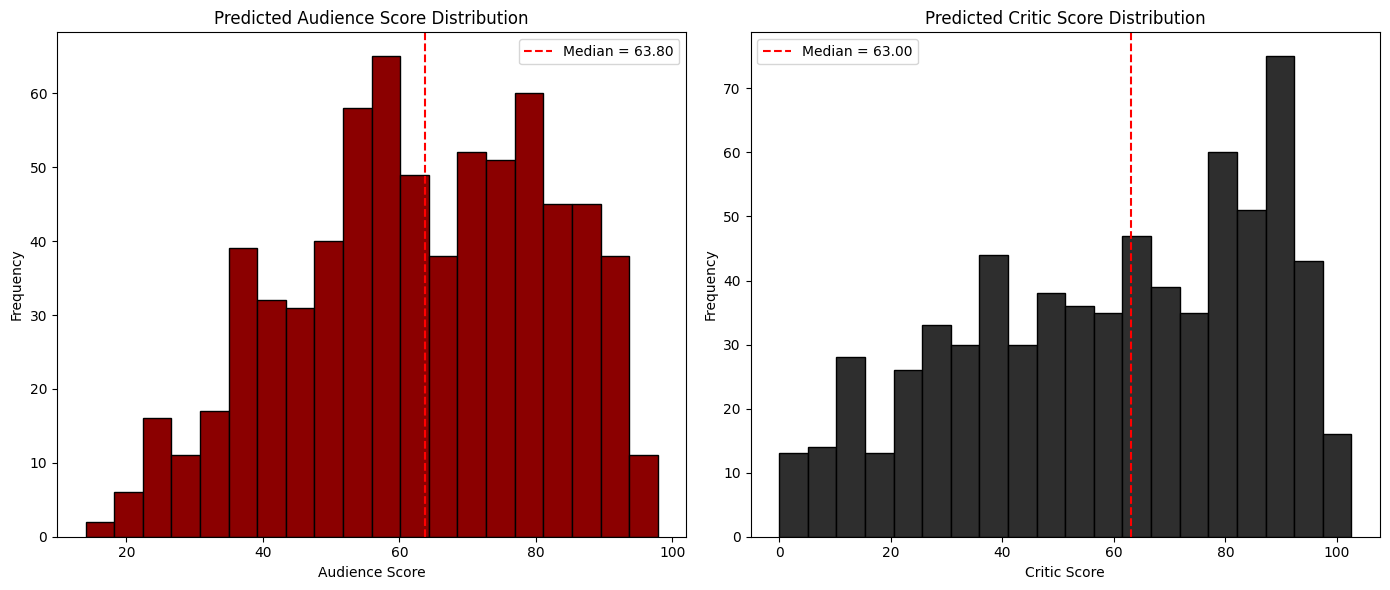

=== Audience Score Model ===
RMSE: 4.21
R²: 0.95

=== Critic Score Model ===
RMSE: 5.16
R²: 0.96
Rotten Tomatoes Predictions (using Linear Regression)

 Test Case 1:
 Predicted Audience Score: 83.00
 Predicted Critic Score: 91.50
 Recommendation: ✅ Recommended for Watching

 Test Case 2:
 Predicted Audience Score: 45.00
 Predicted Critic Score: 101.47
 Recommendation: ❌ Not Recommended


In [33]:
# === IMPORTS === #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

# === 1. LOAD DATA === #
df_netflix = pd.read_csv("Project 3_data.csv")
df_info = pd.read_csv("movie_info.csv")

# === 2. CLEAN & MERGE === #
df_info['audience_score'] = df_info['audience_score'].str.rstrip('%')
df_info['critic_score'] = df_info['critic_score'].str.rstrip('%')
df_info['audience_score'] = pd.to_numeric(df_info['audience_score'], errors='coerce')
df_info['critic_score'] = pd.to_numeric(df_info['critic_score'], errors='coerce')

# Normalize titles
df_netflix['title'] = df_netflix['title'].str.strip().str.lower()
df_info['title'] = df_info['title'].str.strip().str.lower()

# Merge on title
combined = pd.merge(df_netflix, df_info[['title', 'audience_score', 'critic_score']], on='title', how='inner')
combined = combined.dropna(subset=['country', 'director', 'listed_in', 'audience_score', 'critic_score'])

combined = combined.drop_duplicates(subset=['title'])
combined.to_csv('Linear_rotten_combined.csv', index=False)
combined.shape

# === 3. FEATURE ENGINEERING === #
X_raw_rt = combined[['country', 'director', 'listed_in']]
y_rt = combined[['audience_score', 'critic_score']]

encoder_rt = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat_rt = encoder_rt.fit_transform(X_raw_rt)

# === 4. TRAIN MODELS === #
audience_model_rt = LinearRegression().fit(X_cat_rt, y_rt['audience_score'])
critic_model_rt = LinearRegression().fit(X_cat_rt, y_rt['critic_score'])

# === 5. PREDICT ALL FOR THRESHOLDS === #
audience_preds_all_rt = audience_model_rt.predict(X_cat_rt)
critic_preds_all_rt = critic_model_rt.predict(X_cat_rt)

# Compute dynamic thresholds
audience_threshold_rt = np.median(audience_preds_all_rt)
critic_threshold_rt = np.median(critic_preds_all_rt)
print(f"📈 Thresholds → Audience ≥ {audience_threshold_rt:.2f}, Critic ≥ {critic_threshold_rt:.2f}")

# === 6. VISUALIZE DISTRIBUTIONS === #
plt.figure(figsize=(14, 6))

# Audience Score Distribution
plt.subplot(1, 2, 1)
plt.hist(audience_preds_all_rt, bins=20, color='#8B0000', edgecolor='black')
plt.axvline(audience_threshold_rt, color='red', linestyle='--', label=f"Median = {audience_threshold_rt:.2f}")
plt.title("Predicted Audience Score Distribution")
plt.xlabel("Audience Score")
plt.ylabel("Frequency")
plt.legend()

# Critic Score Distribution
plt.subplot(1, 2, 2)
plt.hist(critic_preds_all_rt, bins=20, color='#2E2E2E', edgecolor='black')
plt.axvline(critic_threshold_rt, color='red', linestyle='--', label=f"Median = {critic_threshold_rt:.2f}")
plt.title("Predicted Critic Score Distribution")
plt.xlabel("Critic Score")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

# Example: for audience_score
rmse_audience_rt = np.sqrt(mean_squared_error(y_rt['audience_score'], audience_preds_all_rt))
r2_audience_rt = r2_score(y_rt['audience_score'], audience_preds_all_rt)

print("=== Audience Score Model ===")
print(f"RMSE: {rmse_audience_rt:.2f}")
print(f"R²: {r2_audience_rt:.2f}")

# Example: for critic_score
rmse_critic_rt = np.sqrt(mean_squared_error(y_rt['critic_score'], critic_preds_all_rt))
r2_critic_rt = r2_score(y_rt['critic_score'], critic_preds_all_rt)

print("\n=== Critic Score Model ===")
print(f"RMSE: {rmse_critic_rt:.2f}")
print(f"R²: {r2_critic_rt:.2f}")

# === 7. RECOMMENDATION FUNCTION === #
def predict_and_recommend_auto(country, director, genre):
    """
    Predicts scores and recommends based on dynamic median thresholds.
    """
    try:
        input_df = pd.DataFrame([[country, director, genre]], columns=['country', 'director', 'listed_in'])
        input_cat = encoder_rt.transform(input_df)
        audience_pred = audience_model_rt.predict(input_cat)[0]
        critic_pred = critic_model_rt.predict(input_cat)[0]

        if audience_pred >= audience_threshold_rt and critic_pred >= critic_threshold_rt:
            recommendation = "✅ Recommended for Watching"
        else:
            recommendation = "❌ Not Recommended"

        print(f" Predicted Audience Score: {audience_pred:.2f}")
        print(f" Predicted Critic Score: {critic_pred:.2f}")
        print(f" Recommendation: {recommendation}")

    except Exception as e:
        print(f"❗ Error: {e}")

# === 8. EXAMPLE USAGE === #
print("Rotten Tomatoes Predictions (using Linear Regression)") 
print("\n Test Case 1:")
predict_and_recommend_auto("United States", "Martin Scorsese", "Drama")
print("\n Test Case 2:")
predict_and_recommend_auto("India", "Anurag Kashyap", "Action & Adventure")

##  **Linear Regression using IMDb dataset**
This linear regression model uses IMDb' average rating to predict the average rating for future directed movies and predicts whether a movie is recommended, based on the new predicted average rating, country, director, and genre.

Threshold → Predicted Rating ≥ 6.48 is Recommended
=== Ridge Regression Evaluation ===
RMSE: 0.44
R²: 0.87


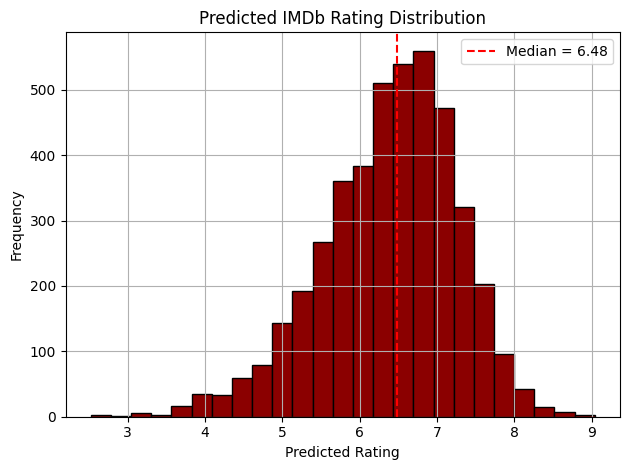

Test Case 1:
Predicted IMDb Rating: 7.24
Recommendation: ✅ Recommended for Watching

Test Case 2:
Predicted IMDb Rating: 7.68
Recommendation: ✅ Recommended for Watching


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# === 1. Load Project Dataset === #
project_df = pd.read_csv("Project 3_data.csv")  # Includes 'title', 'country', 'listed_in'
project_df.rename(columns={'title': 'primaryTitle'}, inplace=True)

# === 2. Load IMDb Datasets === #
title_basics = pd.read_csv("title.basics.tsv", sep="\t", na_values="\\N", low_memory=False)
title_ratings = pd.read_csv("title.ratings.tsv", sep="\t", na_values="\\N")
title_crew = pd.read_csv("title.crew.tsv", sep="\t", na_values="\\N")
name_basics = pd.read_csv("name.basics.tsv", sep="\t", na_values="\\N")

# === 3. Merge IMDb Data === #
df = pd.merge(project_df, title_basics[['tconst', 'primaryTitle']], on='primaryTitle', how='left')
df = pd.merge(df, title_ratings[['tconst', 'averageRating']], on='tconst', how='left')
df = pd.merge(df, title_crew[['tconst', 'directors']], on='tconst', how='left')
df['director_id'] = df['directors'].str.split(',').str[0]
df = pd.merge(df, name_basics[['nconst', 'primaryName']], left_on='director_id', right_on='nconst', how='left')
df.rename(columns={'primaryName': 'director'}, inplace=True)

# === 4. Clean & Export === #
df.dropna(subset=['country', 'listed_in', 'averageRating', 'director'], inplace=True)
df = df.drop_duplicates(subset=['primaryTitle'])
df.to_csv("Final_Merged_Project3_IMDb.csv", index=False)

# === 5. Feature Engineering === #
X_raw = df[['country', 'director', 'listed_in']]
y = df['averageRating']

# === 6. OneHotEncode using DataFrame (no .to_numpy()) === #
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = encoder.fit_transform(X_raw)
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X_raw.columns))

# === 7. Train Ridge Model === #
model = Ridge(alpha=1.0)
model.fit(X_encoded_df, y)
y_pred = model.predict(X_encoded_df)

# === 8. Threshold === #
threshold = np.median(y_pred)
print(f"Threshold → Predicted Rating ≥ {threshold:.2f} is Recommended")

rmse_imdb = np.sqrt(mean_squared_error(y, y_pred))
r2_imdb = r2_score(y,y_pred)

# === 9. Evaluation === #
print("=== Ridge Regression Evaluation ===")
print(f"RMSE: {rmse_imdb:.2f}")
print(f"R²: {r2_imdb:.2f}")

# === 10. Visualize === #
plt.hist(y_pred, bins=25, color='#8B0000', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', label=f"Median = {threshold:.2f}")
plt.title("Predicted IMDb Rating Distribution")
plt.xlabel("Predicted Rating")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === 11. Predict Function (MATCHING DataFrame with same columns) === #
def predict_and_recommend(country, director, genre):
    try:
        input_df = pd.DataFrame({
            'country': [country],
            'director': [director],
            'listed_in': [genre]
        })

        input_df = input_df[X_raw.columns]

        input_encoded = encoder.transform(input_df)
        input_encoded_df = pd.DataFrame(input_encoded, columns=encoder.get_feature_names_out(X_raw.columns))
        pred = model.predict(input_encoded_df)[0]
        recommendation = "✅ Recommended for Watching" if pred >= threshold else "❌ Not Recommended"
        print(f"Predicted IMDb Rating: {pred:.2f}")
        print(f"Recommendation: {recommendation}")
    except Exception as e:
        print("Error:", e)

# === 12. Example Predictions === #
print("Test Case 1:")
predict_and_recommend("United States", "Martin Scorsese", "Drama")

print("\nTest Case 2:")
predict_and_recommend("India", "Anurag Kashyap", "Action")

## 📊 **Model Performance Comparison**
Let's compare how well the two linear regression models performed on their respective datasets (IMDb vs Rotten Tomatoes) using key metrics: **RMSE** and **R²**.

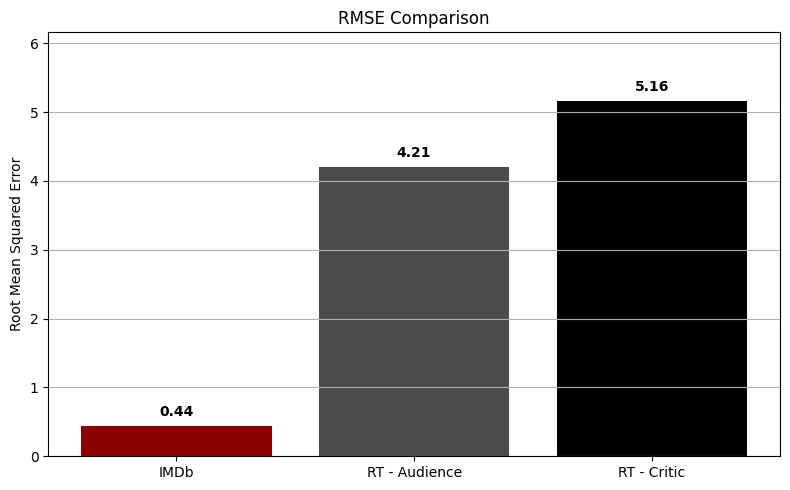

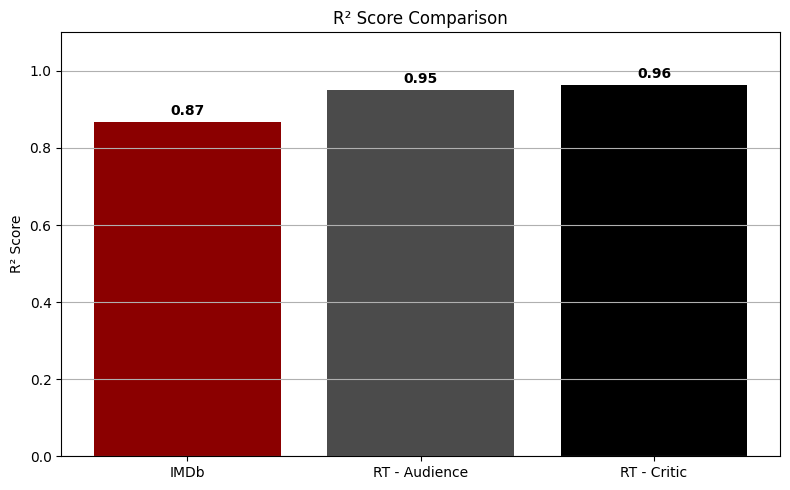

In [35]:
# === Define values ===
rmse_values = {
    'IMDb': rmse_imdb,
    'RT - Audience': rmse_audience_rt,
    'RT - Critic': rmse_critic_rt
}

r2_values = {
    'IMDb': r2_imdb,
    'RT - Audience': r2_audience_rt,
    'RT - Critic': r2_critic_rt
}

# === RMSE Plot ===
plt.figure(figsize=(8, 5))
bars_rmse = plt.bar(rmse_values.keys(), rmse_values.values(), color=['#8B0000', '#4B4B4B', 'black'])
plt.title('RMSE Comparison')
plt.ylabel('Root Mean Squared Error')
plt.ylim(0, max(rmse_values.values()) + 1)
plt.grid(axis='y')

# Adding RMSE values above bars
for bar in bars_rmse:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{height:.2f}",
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# === R² Plot ===
plt.figure(figsize=(8, 5))
bars_r2 = plt.bar(r2_values.keys(), r2_values.values(), color=['#8B0000', '#4B4B4B', 'black'])
plt.title('R² Score Comparison')
plt.ylabel('R² Score')
plt.ylim(0, 1.1)
plt.grid(axis='y')

# Adding R² values above bars
for bar in bars_r2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

##  **Logistic Regression using Rotten Tomatoes dataset**
This logistic regression model uses Rotten Tomatoes' audience and critic scores to predict whether a movie is recommended, based on its country, director, and genre.

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load and clean data
df_netflix = pd.read_csv("Project 3_data.csv")
df_info = pd.read_csv("movie_info.csv")

df_info['audience_score'] = df_info['audience_score'].str.rstrip('%')
df_info['critic_score'] = df_info['critic_score'].str.rstrip('%')
df_info['audience_score'] = pd.to_numeric(df_info['audience_score'], errors='coerce')
df_info['critic_score'] = pd.to_numeric(df_info['critic_score'], errors='coerce')

# Normalize titles
df_netflix['title'] = df_netflix['title'].str.strip().str.lower()
df_info['title'] = df_info['title'].str.strip().str.lower()

# Merge datasets
combined = pd.merge(df_netflix, df_info[['title', 'audience_score', 'critic_score']], on='title', how='inner')
combined.dropna(subset=['country', 'director', 'listed_in', 'audience_score', 'critic_score'], inplace=True)
combined = combined.drop_duplicates(subset=['title'])
combined.to_csv('Logistic_rotten_combined.csv', index=False)

# Create binary target based on thresholds
aud_threshold = combined['audience_score'].median()
crit_threshold = combined['critic_score'].median()

combined['recommend'] = np.where(
    (combined['audience_score'] >= aud_threshold) & (combined['critic_score'] >= crit_threshold),
    1, 0
)

# Prepare features and target
X_raw_rt = combined[['country', 'director', 'listed_in']]
y_rt = combined['recommend']

# OneHotEncode features
encoder_rt = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded_rt = encoder_rt.fit_transform(X_raw_rt)

# Train/test split
X_train_rt, X_test_rt, y_train_rt, y_test_rt = train_test_split(X_encoded_rt, y_rt, test_size=0.2, random_state=42)

# Train logistic regression
log_model_rt = LogisticRegression(max_iter=1000)
log_model_rt.fit(X_train_rt, y_train_rt)

# Predictions
y_pred_rt = log_model_rt.predict(X_test_rt)

# Evaluation
print("=== Classification Report ===")
print(classification_report(y_test_rt, y_pred_rt))

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test_rt, y_pred_rt))

# Prediction function
def predict_recommendation(country, director, genre):
    try:
        input_df = pd.DataFrame([[country, director, genre]], columns=['country', 'director', 'listed_in'])
        input_encoded = encoder_rt.transform(input_df)
        pred = log_model_rt.predict(input_encoded)[0]
        prob = log_model_rt.predict_proba(input_encoded)[0][1]
        print(f"✅ Recommended" if pred == 1 else "❌ Not Recommended")
        print(f"Confidence: {prob:.2%}")
    except Exception as e:
        print(f"Error: {e}")

# Example Usage
predict_recommendation("United States", "Martin Scorsese", "Drama")
predict_recommendation("India", "Anurag Kashyap", "Action & Adventure")

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.73      0.82      0.77        90
           1       0.61      0.48      0.54        52

    accuracy                           0.70       142
   macro avg       0.67      0.65      0.66       142
weighted avg       0.69      0.70      0.69       142

=== Confusion Matrix ===
[[74 16]
 [27 25]]
✅ Recommended
Confidence: 70.38%
❌ Not Recommended
Confidence: 43.05%


##  **Logistic Regression using IMDb dataset**
This logistic regression model uses IMDb's average ratings to predict whether a movie is recommended, based on its country, director, and genre.

In [37]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Load IMDb data
basics = pd.read_csv('title.basics.tsv', sep='\t', na_values='\\N', dtype=str)
ratings = pd.read_csv('title.ratings.tsv', sep='\t', na_values='\\N', dtype=str)
crew = pd.read_csv('title.crew.tsv', sep='\t', na_values='\\N', dtype=str)
names = pd.read_csv('name.basics.tsv', sep='\t', na_values='\\N', dtype=str)

# Load real country data from Project 3
project3 = pd.read_csv('Project 3_data.csv')
project3 = project3[['title', 'country']]
project3['title'] = project3['title'].str.strip().str.lower()

# Filter for movies only
movies = basics[basics['titleType'] == 'movie'].copy()
movies['primaryTitle'] = movies['primaryTitle'].str.strip().str.lower()

# Merge IMDb datasets
df = movies.merge(ratings, on='tconst', how='inner')
df = df.merge(crew[['tconst', 'directors']], on='tconst', how='left')
df = df.dropna(subset=['averageRating', 'genres', 'directors'])

# Convert average rating to float
df['averageRating'] = df['averageRating'].astype(float)

# Create binary recommend label based on median rating
threshold = df['averageRating'].median()
df['recommend'] = (df['averageRating'] >= threshold).astype(int)

# Use only the first listed director ID
df['directors'] = df['directors'].apply(lambda x: x.split(',')[0])

# Map director ID to name
id_to_name = dict(zip(names['nconst'], names['primaryName']))
df['director_name'] = df['directors'].map(id_to_name)

# Join with real country from project3 on movie title
df = df.merge(project3, left_on='primaryTitle', right_on='title', how='left')
df.rename(columns={'country': 'real_country'}, inplace=True)
df = df.dropna(subset=['real_country', 'director_name'])

# Features and target
features = df[['real_country', 'director_name', 'genres']]
features.columns = ['country', 'director', 'listed_in']  # Rename for consistency
target_imdb = df['recommend']

# One-hot encoding
encoder_imdb = OneHotEncoder(handle_unknown='ignore')
X_encoded_imdb = encoder_imdb.fit_transform(features)

# Train-test split
X_train_imdb, X_test_imdb, y_train_imdb, y_test_imdb = train_test_split(X_encoded_imdb, target_imdb, test_size=0.2, random_state=42)

# Train logistic regression model
log_model_imdb = LogisticRegression(max_iter=1000)
log_model_imdb.fit(X_train_imdb, y_train_imdb)

# Evaluation
y_pred_imdb = log_model_imdb.predict(X_test_imdb)
print("=== Classification Report ===")
print(classification_report(y_test_imdb, y_pred_imdb))

# Updated prediction function
def predict_recommendation(country, director, genre):
    try:
        input_df = pd.DataFrame([[country, director, genre]], columns=['country', 'director', 'listed_in'])
        input_encoded = encoder_imdb.transform(input_df)
        pred = log_model_imdb.predict(input_encoded)[0]
        prob = log_model_imdb.predict_proba(input_encoded)[0][1]
        print("✅ Recommended" if pred == 1 else "❌ Not Recommended")
        print(f"Confidence: {prob:.2%}")
    except Exception as e:
        print(f"❗ Error: {e}")

# ✅ Example usage
predict_recommendation("United States", "Martin Scorsese", "Drama")
predict_recommendation("India", "Anurag Kashyap", "Action")

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.70      0.63      0.66       823
           1       0.66      0.73      0.70       831

    accuracy                           0.68      1654
   macro avg       0.68      0.68      0.68      1654
weighted avg       0.68      0.68      0.68      1654

✅ Recommended
Confidence: 83.31%
✅ Recommended
Confidence: 55.25%


## 📊 **Model Performance Comparison**
Let's compare how well the two logistic regression models performed on their respective datasets (IMDb vs Rotten Tomatoes) using key metrics: **Accuracy**, **Precision**, **Recall**, and **F1-Score**.

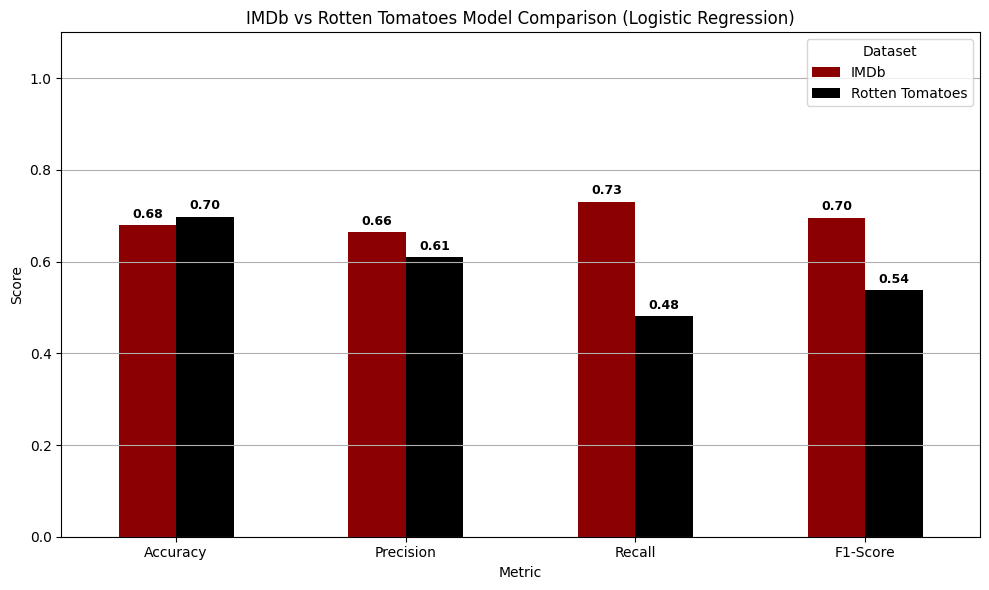

In [38]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

# === IMDb Model Metrics ===
imdb_report = classification_report(y_test_imdb, y_pred_imdb, output_dict=True)
imdb_accuracy = accuracy_score(y_test_imdb, y_pred_imdb)
imdb_precision = imdb_report['1']['precision']
imdb_recall = imdb_report['1']['recall']
imdb_f1 = imdb_report['1']['f1-score']

# === Rotten Tomatoes Model Metrics ===
rt_report = classification_report(y_test_rt, y_pred_rt, output_dict=True)
rt_accuracy = accuracy_score(y_test_rt, y_pred_rt)
rt_precision = rt_report['1']['precision']
rt_recall = rt_report['1']['recall']
rt_f1 = rt_report['1']['f1-score']

# === Create Comparison DataFrame ===
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'IMDb': [imdb_accuracy, imdb_precision, imdb_recall, imdb_f1],
    'Rotten Tomatoes': [rt_accuracy, rt_precision, rt_recall, rt_f1]
}).set_index('Metric')

# === Create the bar plot and capture the axes ===
fig, ax = plt.subplots(figsize=(10, 6))
bar_plot = metrics_df.plot(
    kind='bar',
    ax=ax,
    rot=0,
    color=['#8B0000', 'black']  # Dark Red for IMDb, Black for Rotten Tomatoes
)

# === Add value labels above bars ===
for container in bar_plot.containers:
    for bar in container:
        height = bar.get_height()
        bar_plot.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.01,
            f"{height:.2f}",
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

# === Style the plot ===
bar_plot.set_title('IMDb vs Rotten Tomatoes Model Comparison (Logistic Regression)')
bar_plot.set_ylabel('Score')
bar_plot.set_ylim(0, 1.1)
bar_plot.grid(axis='y')
bar_plot.legend(title="Dataset")
plt.tight_layout()
plt.show()